## Capstone project

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import chi2_contingency, ttest_ind, f_oneway

import os
import time
import warnings
warnings.filterwarnings('ignore')

Reading datasets into dataframe

In [27]:
df_crop=pd.read_csv('Optimizing Agriculture Production.csv')

## Descriptive statistic

➔ Temperature, Humidity, Rainfall.

➔ The dataset also consists of soil conditions required to grow the crops

➔ N: The Ratio of Nitrogen Content in Soil.

➔ P: The Ratio of Phosphorus Content in Soil.

➔ K: The Ratio of Potassium Content in Soil.

➔ pH: pH of the Soil

In [28]:
df_crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [29]:
df_crop.shape

(2200, 8)

In [30]:
df_crop.label = df_crop.label.astype('category')

In [31]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [32]:
df_crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [33]:
df_crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Checking crop count in dataset

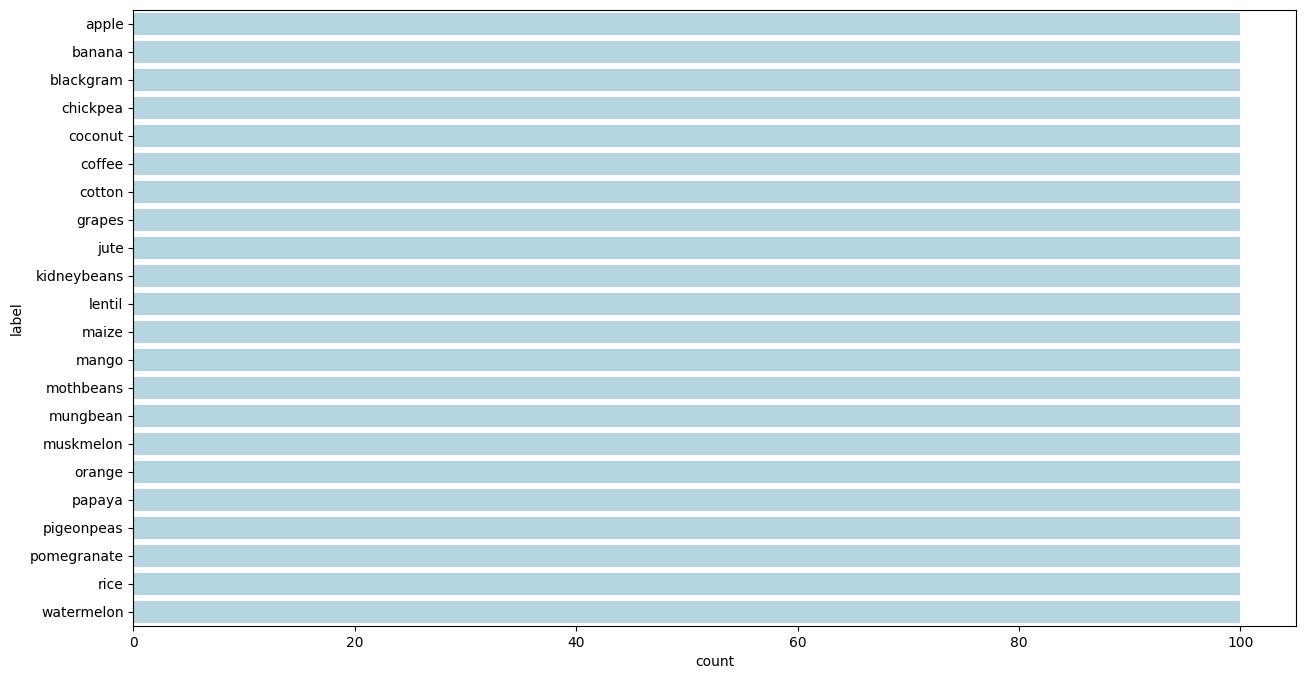

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(y='label', data=df_crop, color='lightblue')  # Specify the palette here
plt.show()

we see count's are distributed same for all crops

# Checking outliers

In [35]:
columns=df_crop.columns
columns=columns[:-1] #exculding label(category) column

------------------------------------------------------------------------------------------------------------------------


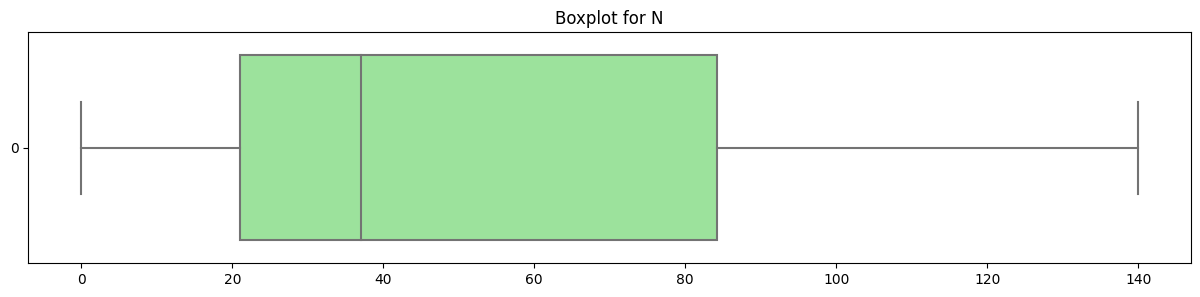

------------------------------------------------------------------------------------------------------------------------


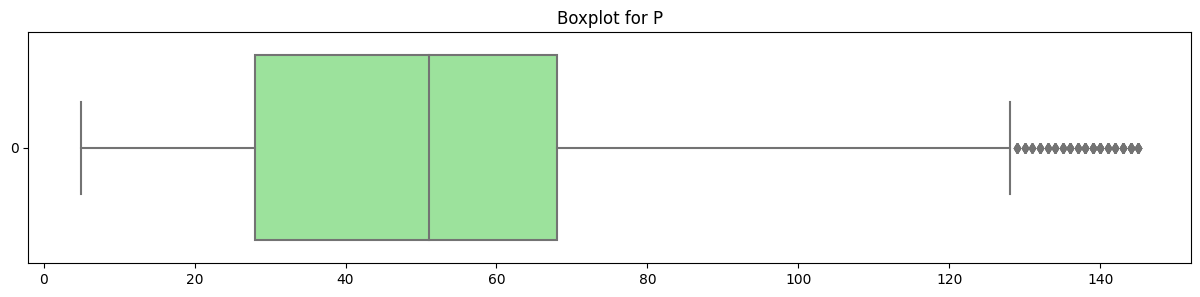

------------------------------------------------------------------------------------------------------------------------


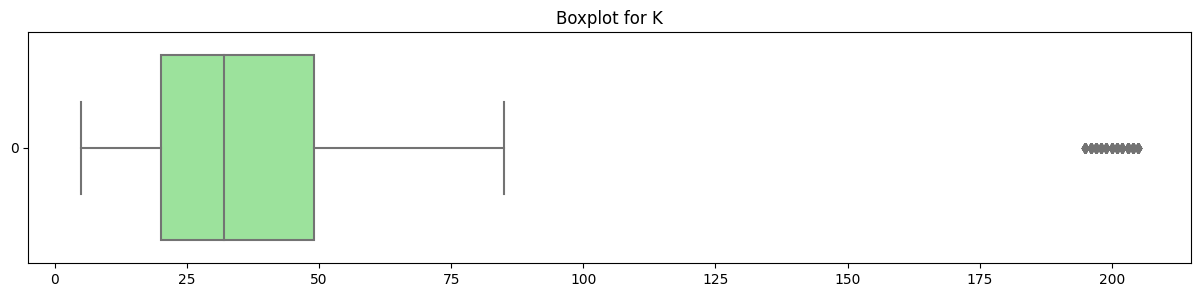

------------------------------------------------------------------------------------------------------------------------


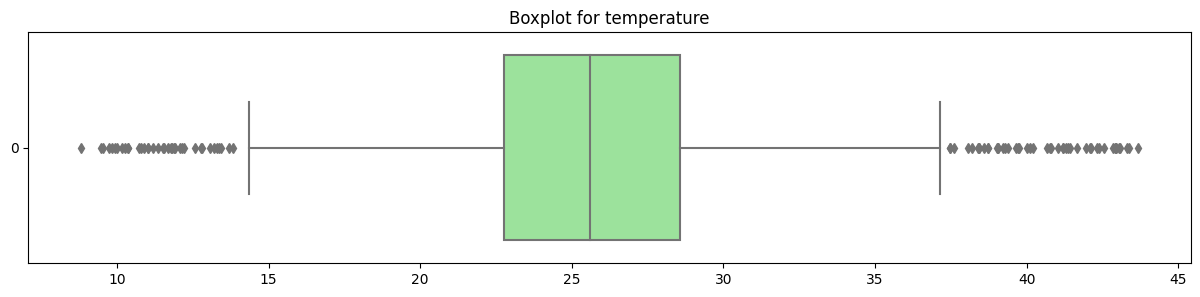

------------------------------------------------------------------------------------------------------------------------


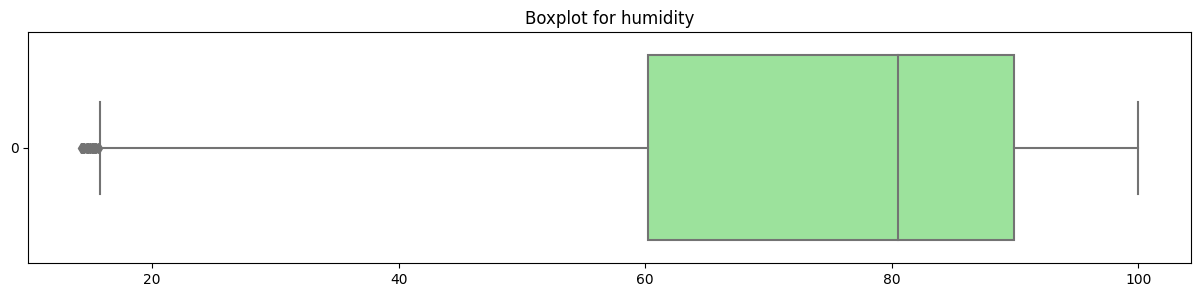

------------------------------------------------------------------------------------------------------------------------


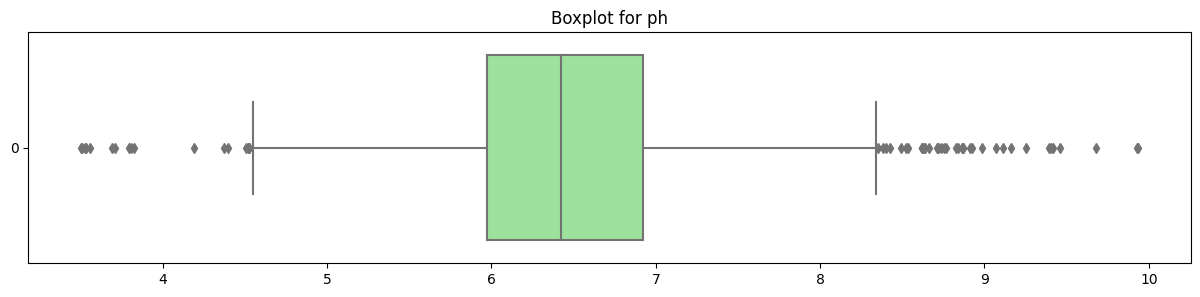

------------------------------------------------------------------------------------------------------------------------


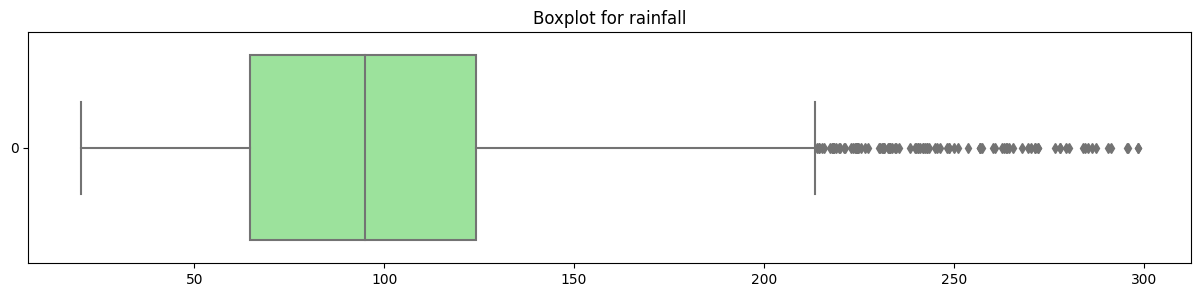

In [36]:
for col in columns:
    plt.figure(figsize=(15,3))
    plt.title(f'Boxplot for {col}')
    sns.boxplot(df_crop[col] , orient='h',color='lightgreen')
    print('------'*20)
    plt.show()

Analyzing the outliers based on each crops

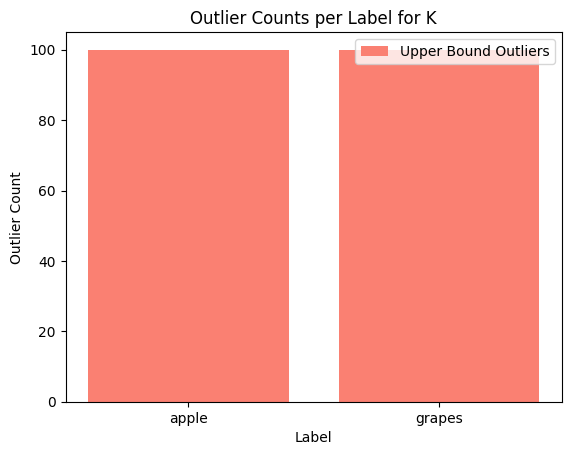

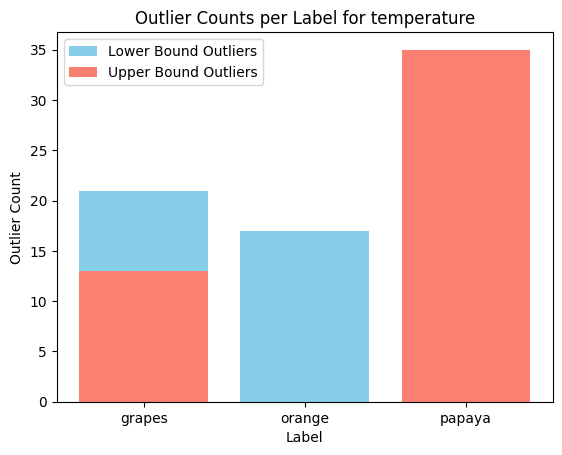

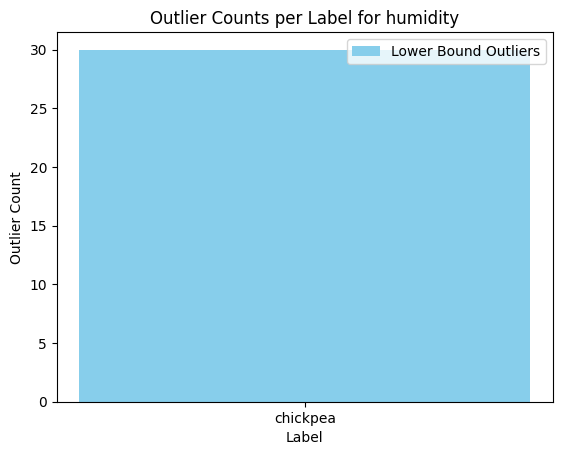

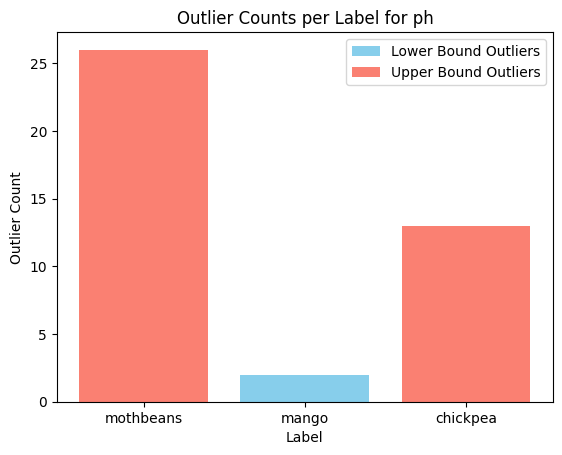

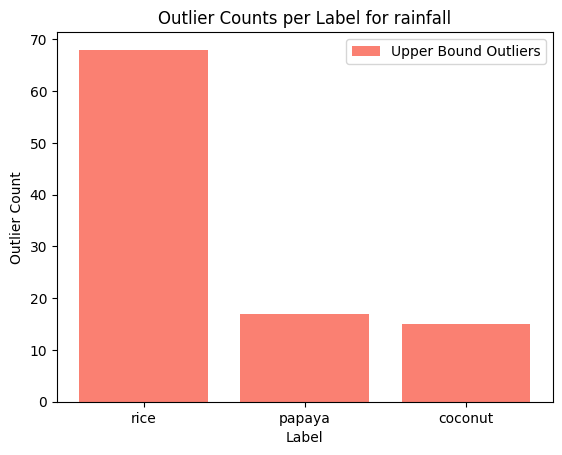

In [37]:
columns=columns[2:] # we removed attribute 'N' as we observed 0 outliers
for col in columns:
    q1 = df_crop[col].quantile(0.25)
    q3 = df_crop[col].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    
    outliers_lb = df_crop[df_crop[col] < lb]
    outliers_ub = df_crop[df_crop[col] > ub]
    
    outlier_counts_lb = outliers_lb['label'].value_counts()
    outlier_counts_ub = outliers_ub['label'].value_counts()
    
    outlier_counts_lb = outlier_counts_lb[outlier_counts_lb != 0]  
    outlier_counts_ub = outlier_counts_ub[outlier_counts_ub != 0] 
    
    if not outlier_counts_lb.empty:
        plt.bar(outlier_counts_lb.index, outlier_counts_lb.values, color='skyblue', label='Lower Bound Outliers')
    
    if not outlier_counts_ub.empty:
        plt.bar(outlier_counts_ub.index, outlier_counts_ub.values, color='salmon', label='Upper Bound Outliers')
    
    plt.xlabel('Label')
    plt.ylabel('Outlier Count')
    plt.title(f'Outlier Counts per Label for {col}')
    plt.legend()
    plt.show()

- add points on outliers
- we also find out patterns

# Treat outliers if required

# checking data distribution

<Figure size 1500x300 with 0 Axes>

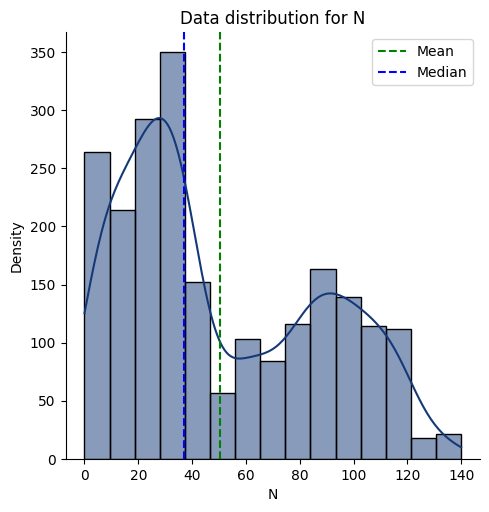

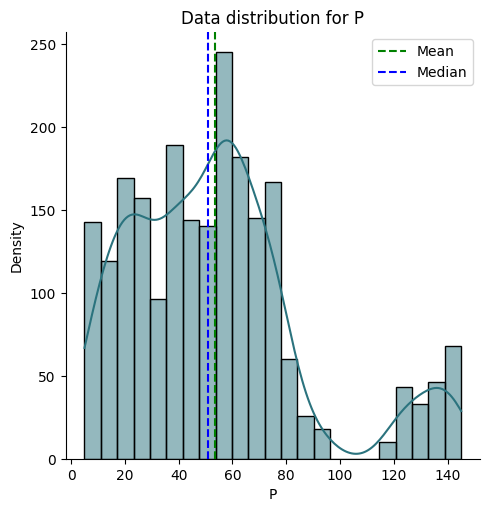

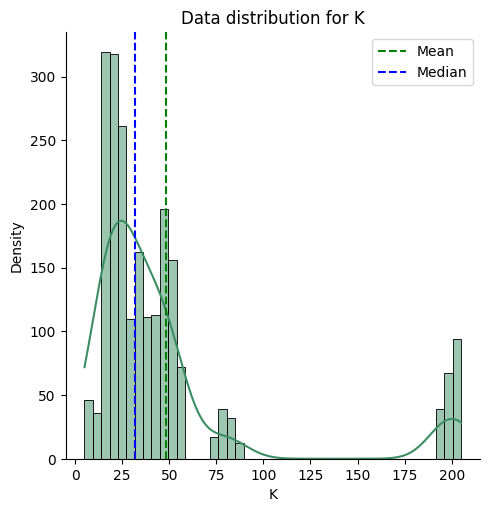

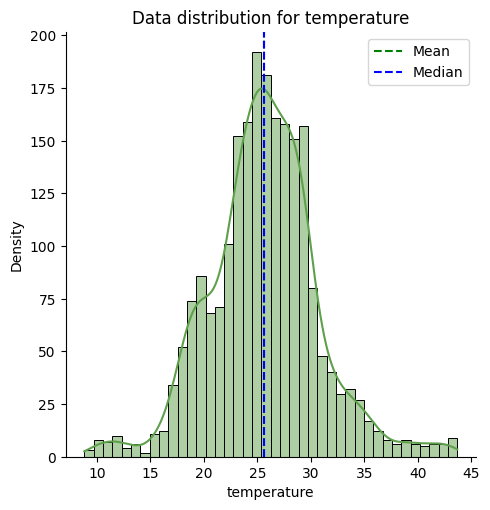

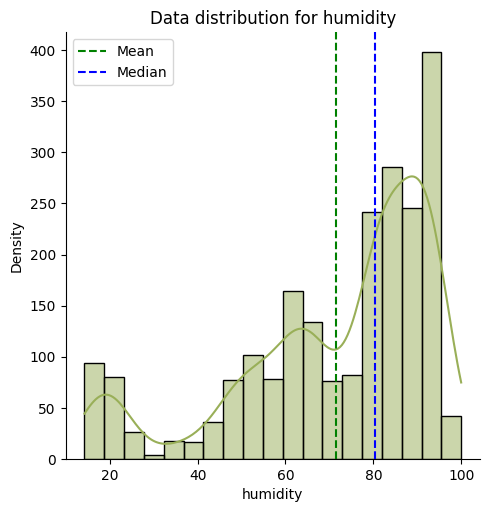

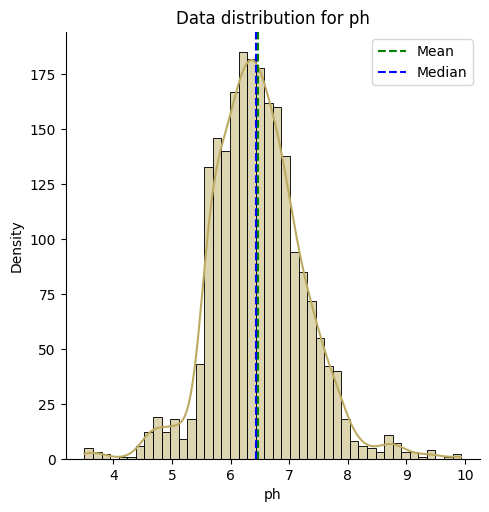

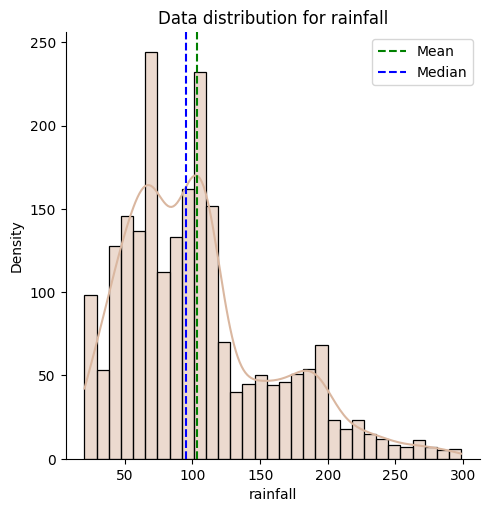

In [38]:
columns=df_crop.columns
columns=columns[:-1] 
palette = sns.color_palette("gist_earth", len(columns))
plt.figure(figsize=(15,3))
for i, col in enumerate(columns):
    sns.displot(df_crop[col], kde=True, color=palette[i])
    plt.xlabel(col) 
    plt.ylabel('Density')
    plt.title(f'Data distribution for {col}')
    plt.axvline(df_crop[col].mean(), c='green', ls='--', label='Mean')
    plt.axvline(df_crop[col].median(), c='blue', ls='--', label='Median')
    plt.legend()
    plt.show()

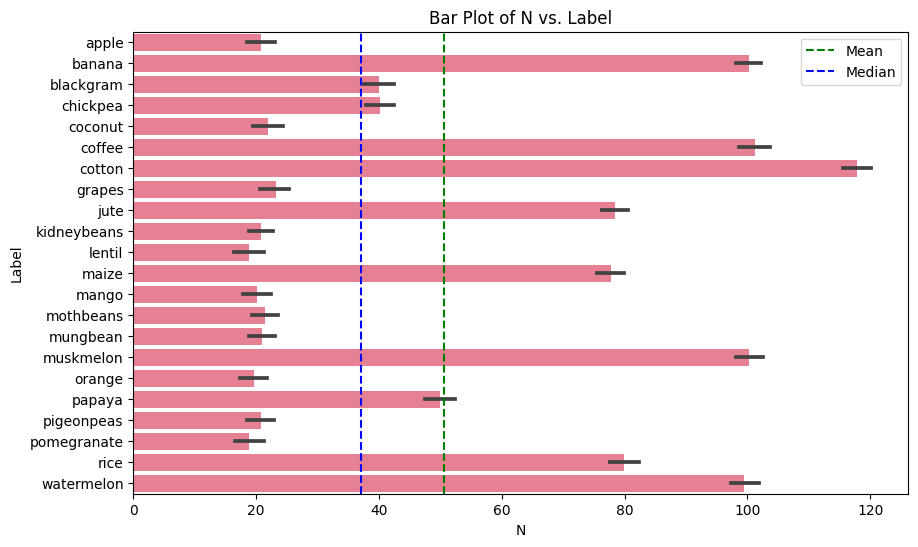

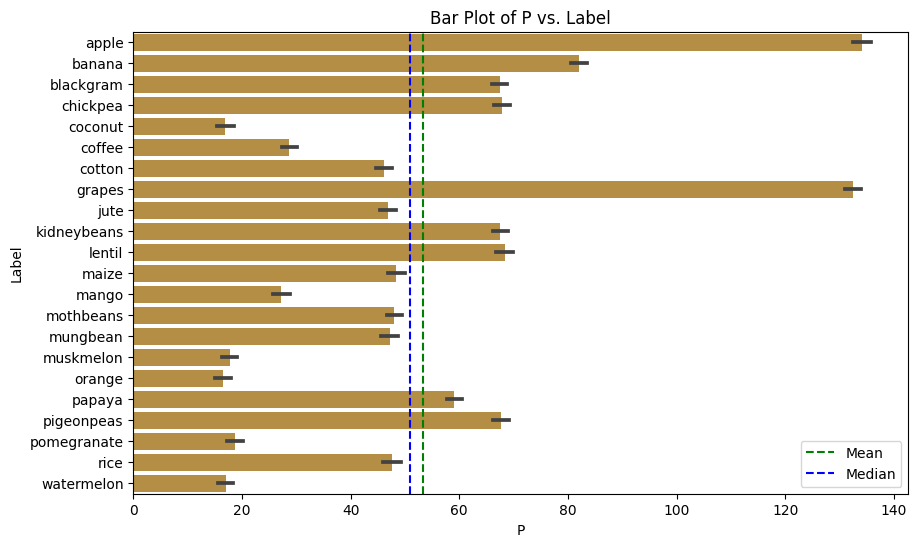

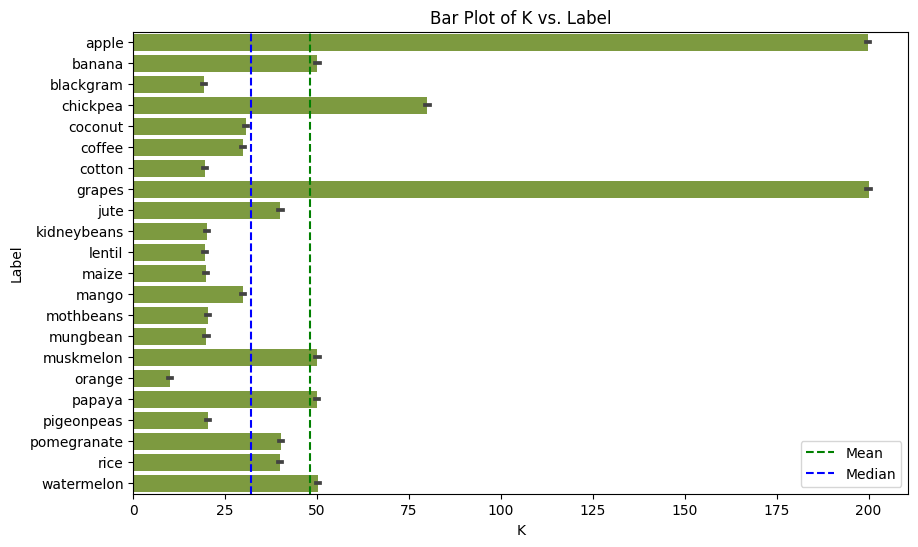

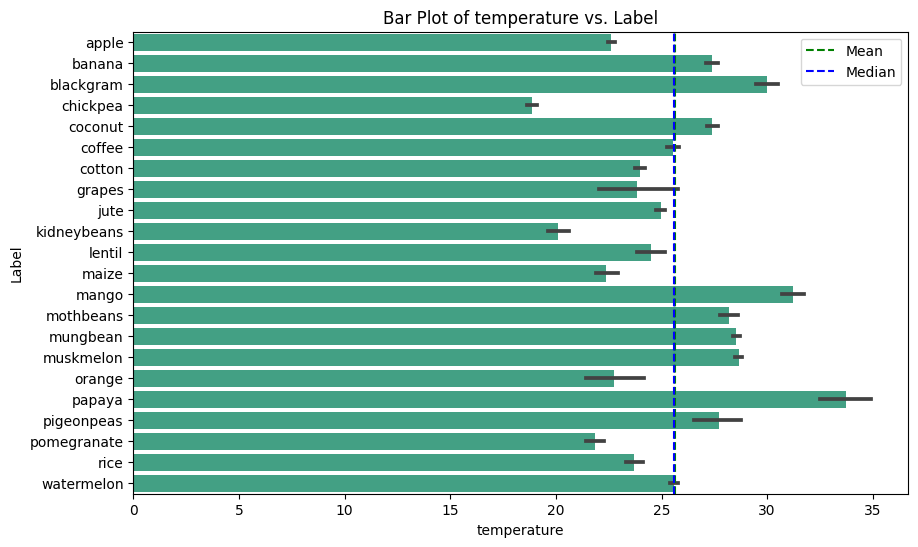

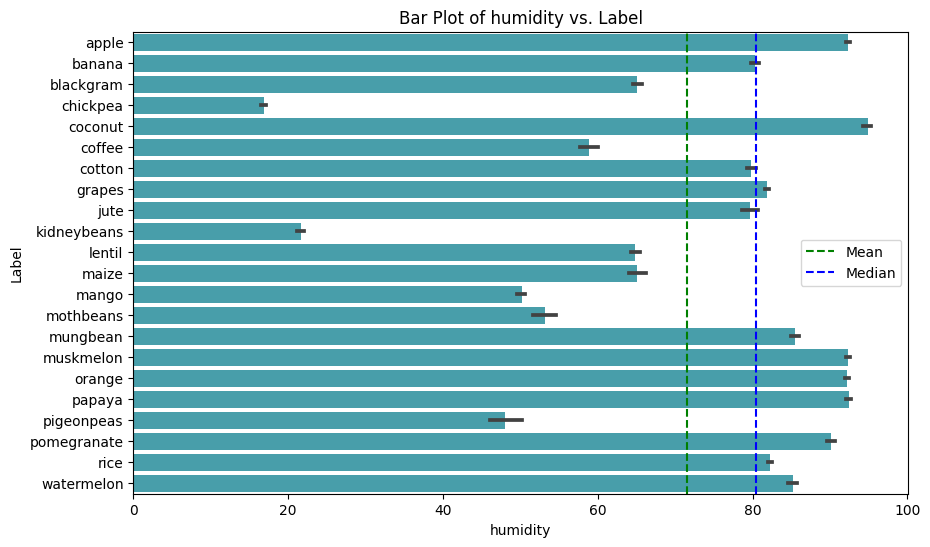

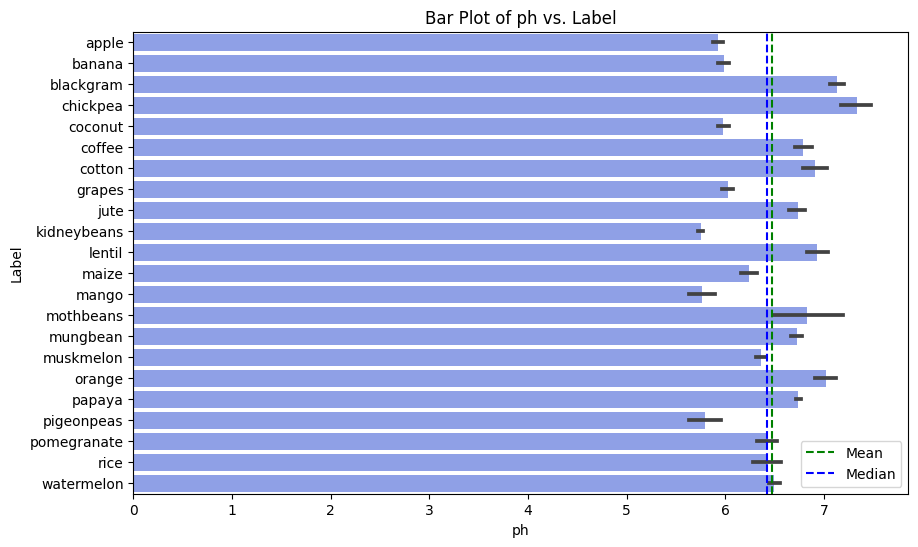

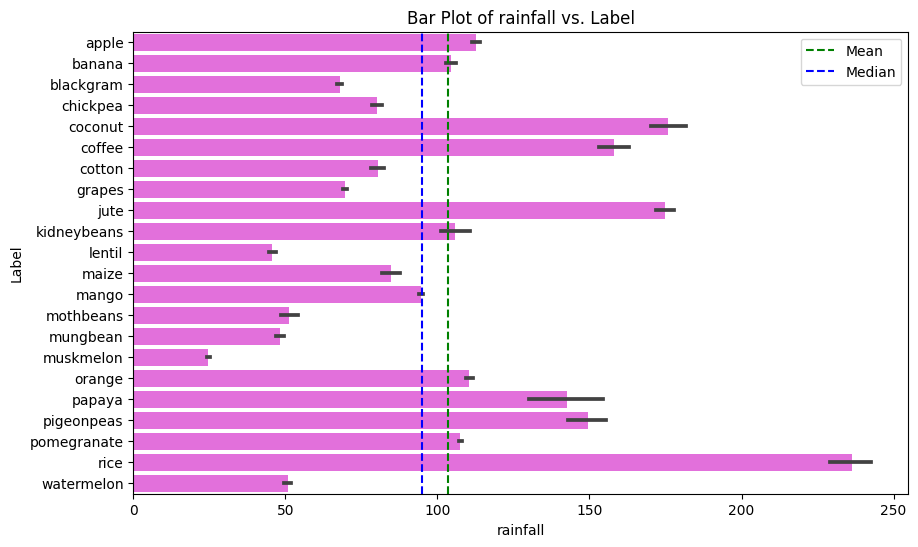

In [39]:
columns=df_crop.columns
columns=columns[:-1] 
palette = sns.color_palette("husl", len(columns))  
for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6)) 
    sns.barplot(data=df_crop, x=col, y='label', color=palette[i])
    plt.title(f'Bar Plot of {col} vs. Label')
    plt.xlabel(col)
    plt.axvline(df_crop[col].mean(), c='green', ls='--', label='Mean')
    plt.axvline(df_crop[col].median(), c='blue', ls='--', label='Median')
    plt.legend()
    plt.ylabel('Label')
    plt.show()

In [40]:
corr=df_crop.corr(numeric_only=True)

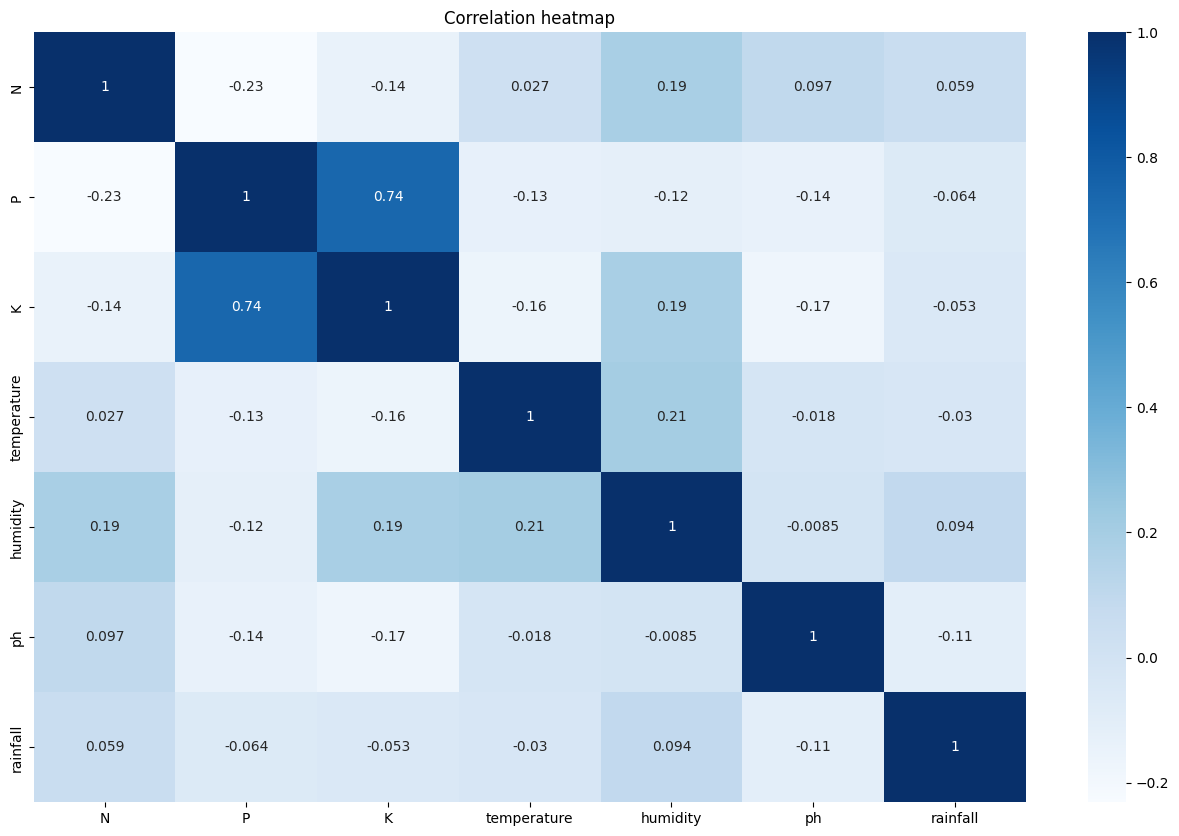

In [41]:
plt.figure(figsize=(16,10))

sns.heatmap(corr ,annot=True , cmap="Blues")
plt.title('Correlation heatmap')
plt.show()

- The strong positive correlation of 0.736 between Phosphorus (P) and Potassium (K) suggests a significant relationship between these two soil nutrients, which is crucial in agricultural practices and plant growth.

- The weak negative correlation of -0.063839 between Phosphorus (P) and Rainfall suggests a minor inverse relationship, indicating that higher phosphorus levels may be associated with lower rainfall conditions.


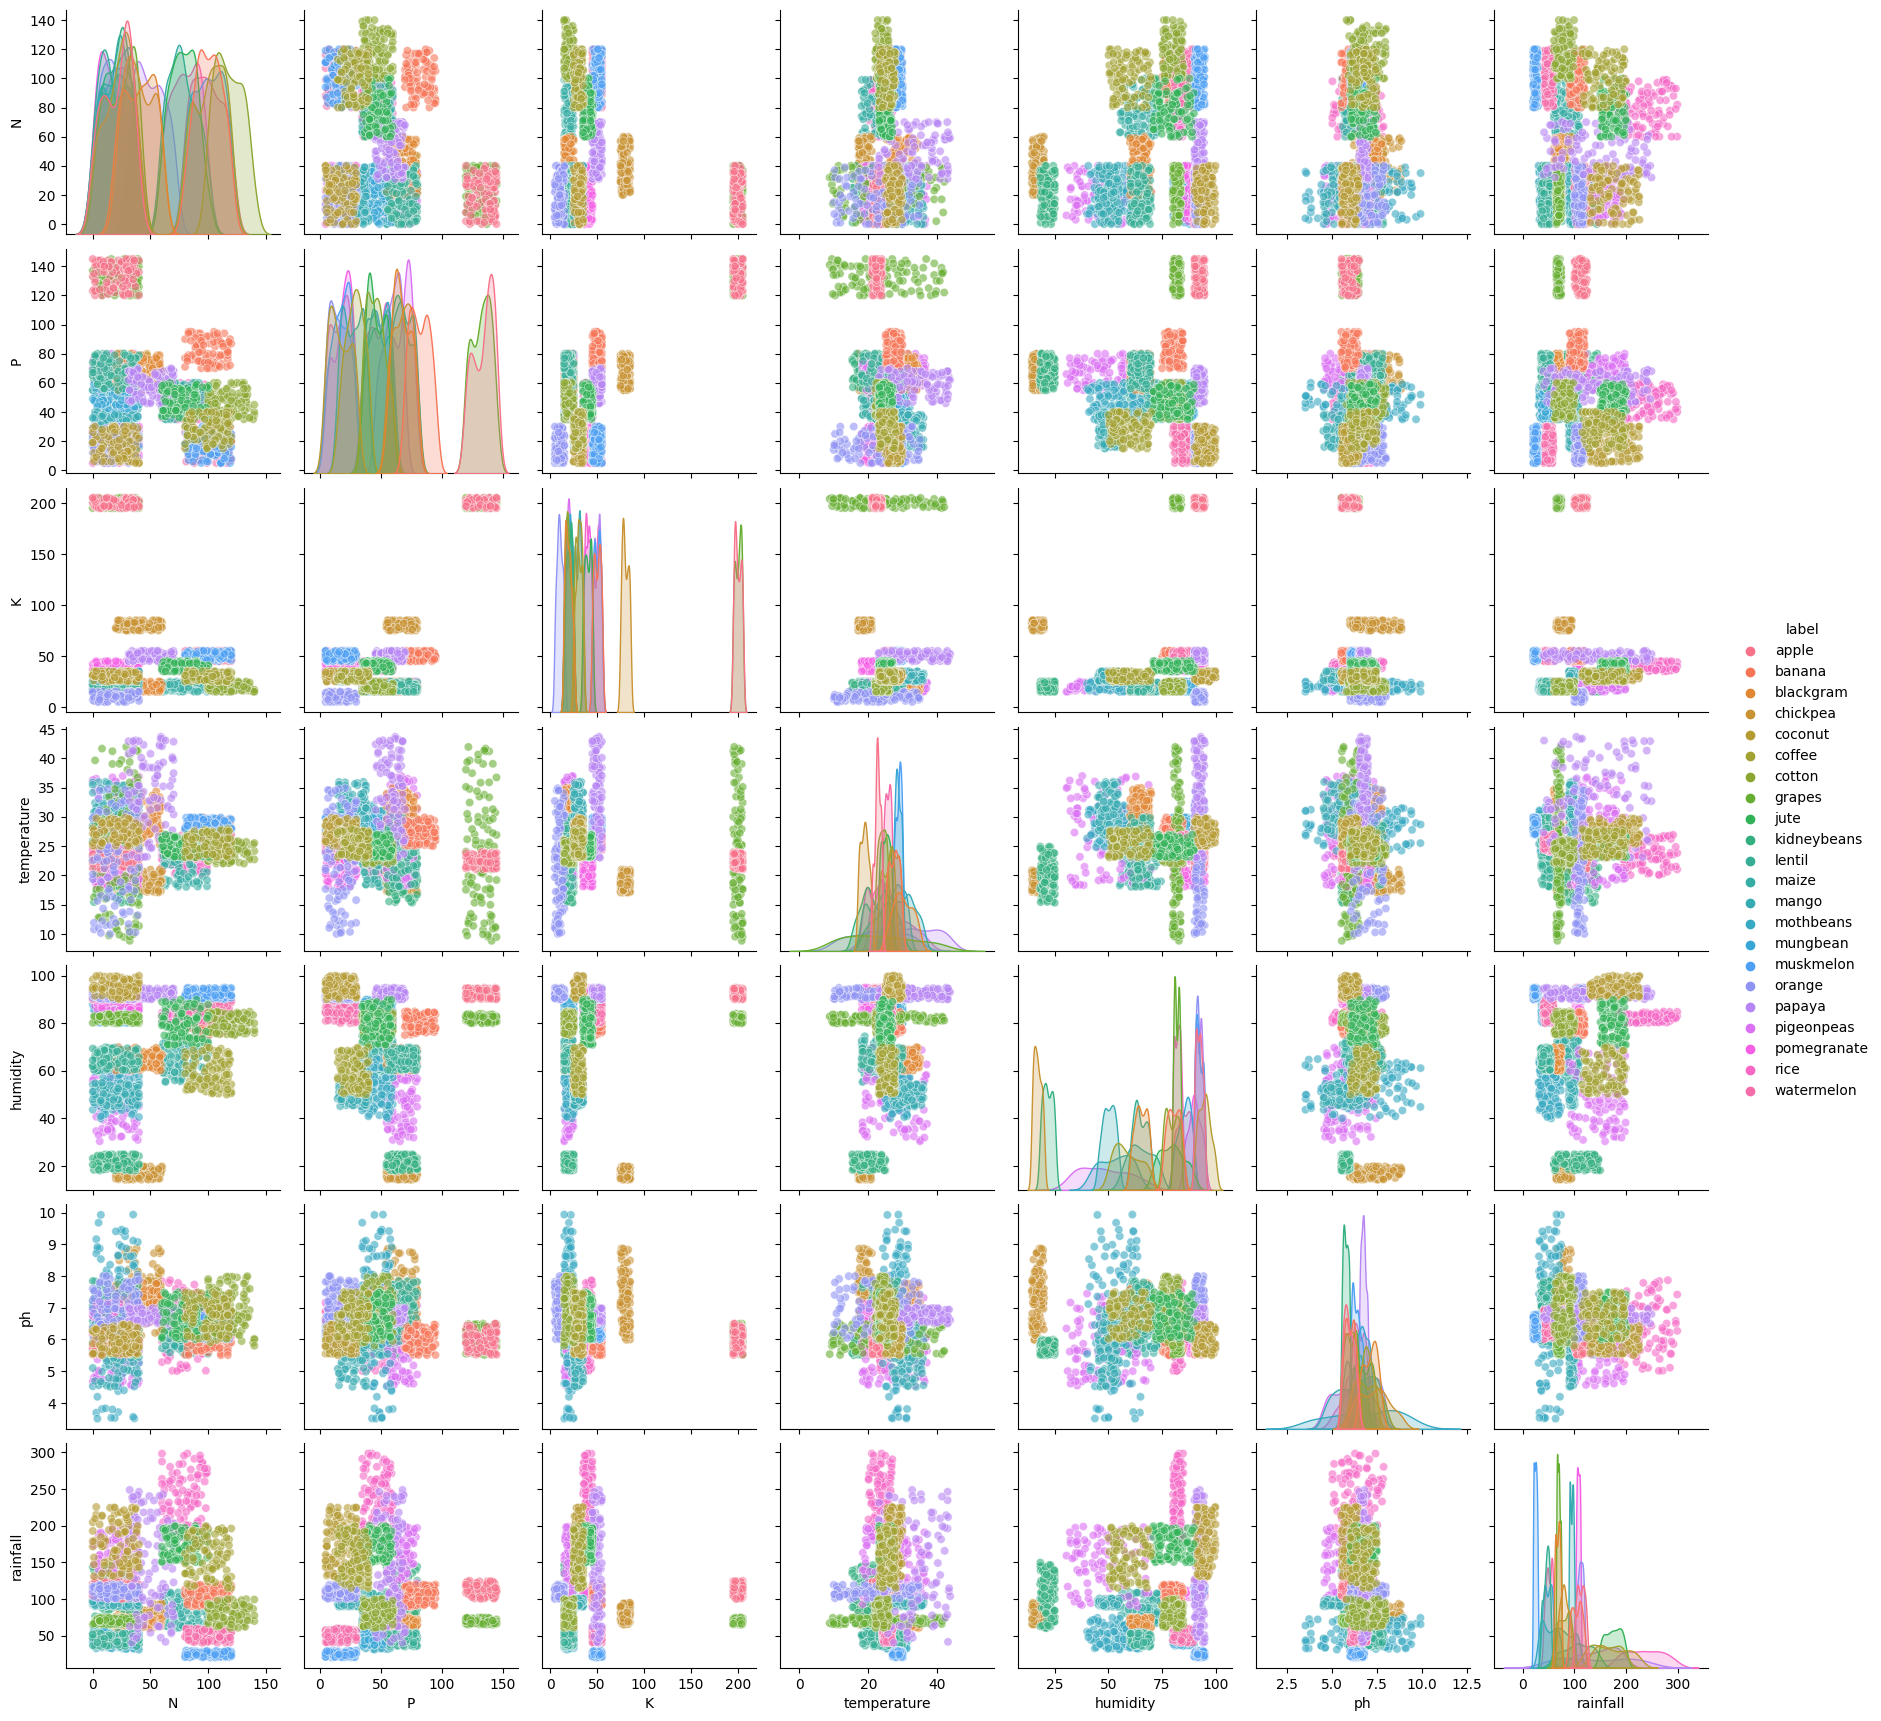

In [42]:
palette = sns.color_palette("husl", 22)  # Generating a color palette for the plots
sns.pairplot(df_crop, diag_kind='kde', plot_kws={'alpha': 0.6} ,hue='label',palette=palette)
plt.show()

In [43]:
df_temp=pd.DataFrame(df_crop.copy())

In [44]:
def find_season(row):
    if row['rainfall'] > 124 and row['temperature'] > 20:
        return 'Monsoon'
    elif row['temperature'] >= 27 and row['rainfall'] <= 124:
        return 'Summer'
    elif (row['temperature'] < 26 and row['humidity'] <= 50) or (row['temperature'] < 20):
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the DataFrame
df_temp['seasons'] = df_temp.apply(find_season, axis=1)


**There are 3 major seasons for crop cultivation in India.**

- **Monsoon Season**: These crops are also known as the Kharif season, Kharif crops are sown at the beginning of the monsoon season, typically from May to October. These crops require a lot of water and hot conditions to grow well.


- **Winter Season**: These crops are also known as Rabi season.Rabi crops are planted after the monsoon season, around October or mid-November, and are harvested in April or                  May. 


- **Summer Season**: These crops are also known as Zaid season.Zaid crops are grown between the Rabi and Kharif seasons, typically from March to June. These crops require warm,                dry weather and mature early.

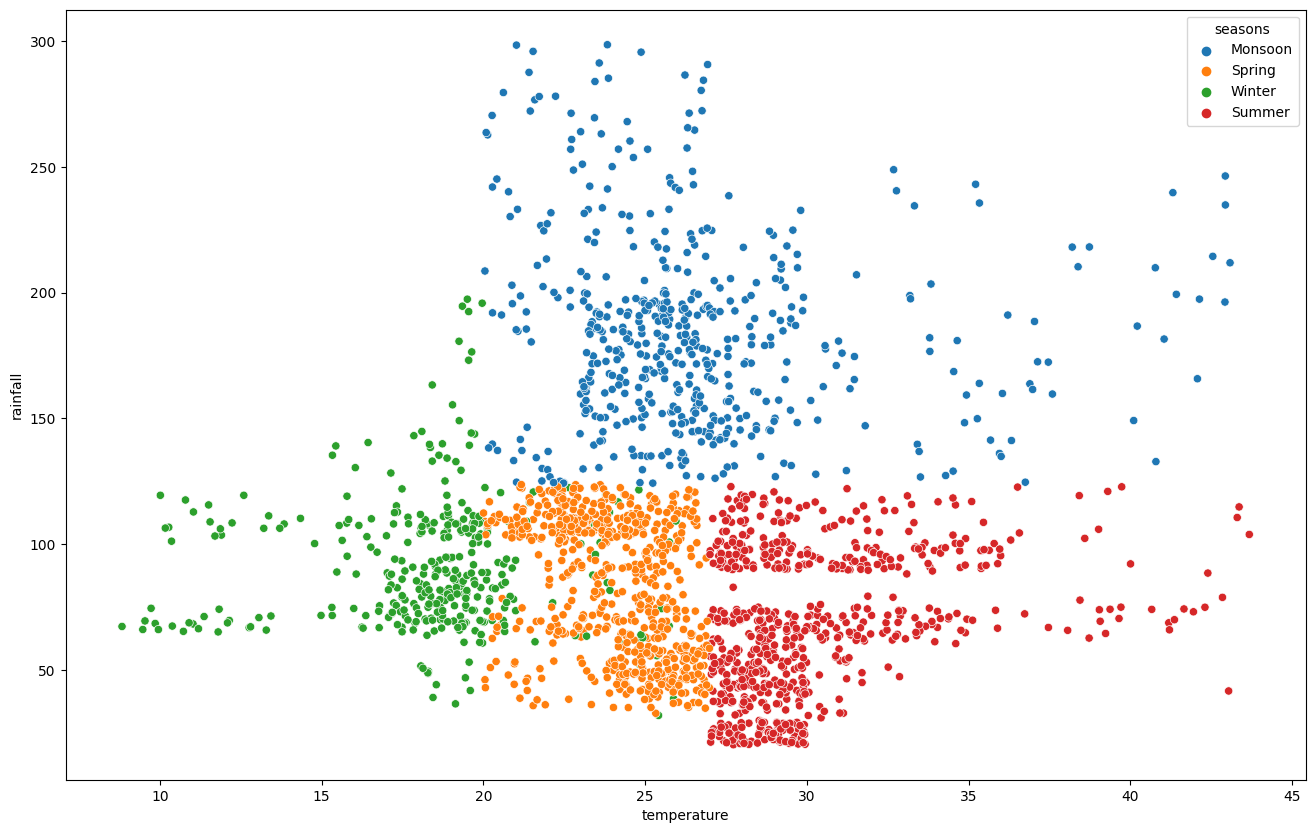

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_temp , x='temperature',y='rainfall' , hue='seasons')
plt.show()

In [46]:
# print(df_temp.groupby('seasons')['label'].unique())
print('*****'*3,'Monsoon crops','*****'*3,'')
print(df_temp[df_temp['seasons']=='Monsoon']['label'].unique().tolist())
print('\n')
print('*****'*3,'Summer crops','*****'*3)
print(df_temp[df_temp['seasons']=='Summer']['label'].unique().tolist())
print('\n')

print('*****'*3,'Winter crops','*****'*3)
print(df_temp[df_temp['seasons']=='Winter']['label'].unique().tolist())
print('\n')

print('*****'*3,'Spring crops','*****'*3)
print(df_temp[df_temp['seasons']=='Spring']['label'].unique().tolist())

*************** Monsoon crops *************** 
['rice', 'kidneybeans', 'pigeonpeas', 'apple', 'papaya', 'coconut', 'jute', 'coffee']


*************** Summer crops ***************
['pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'muskmelon', 'orange', 'papaya', 'coffee']


*************** Winter crops ***************
['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'lentil', 'pomegranate', 'grapes', 'orange']


*************** Spring crops ***************
['maize', 'pigeonpeas', 'mothbeans', 'blackgram', 'lentil', 'pomegranate', 'banana', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'cotton', 'coffee']


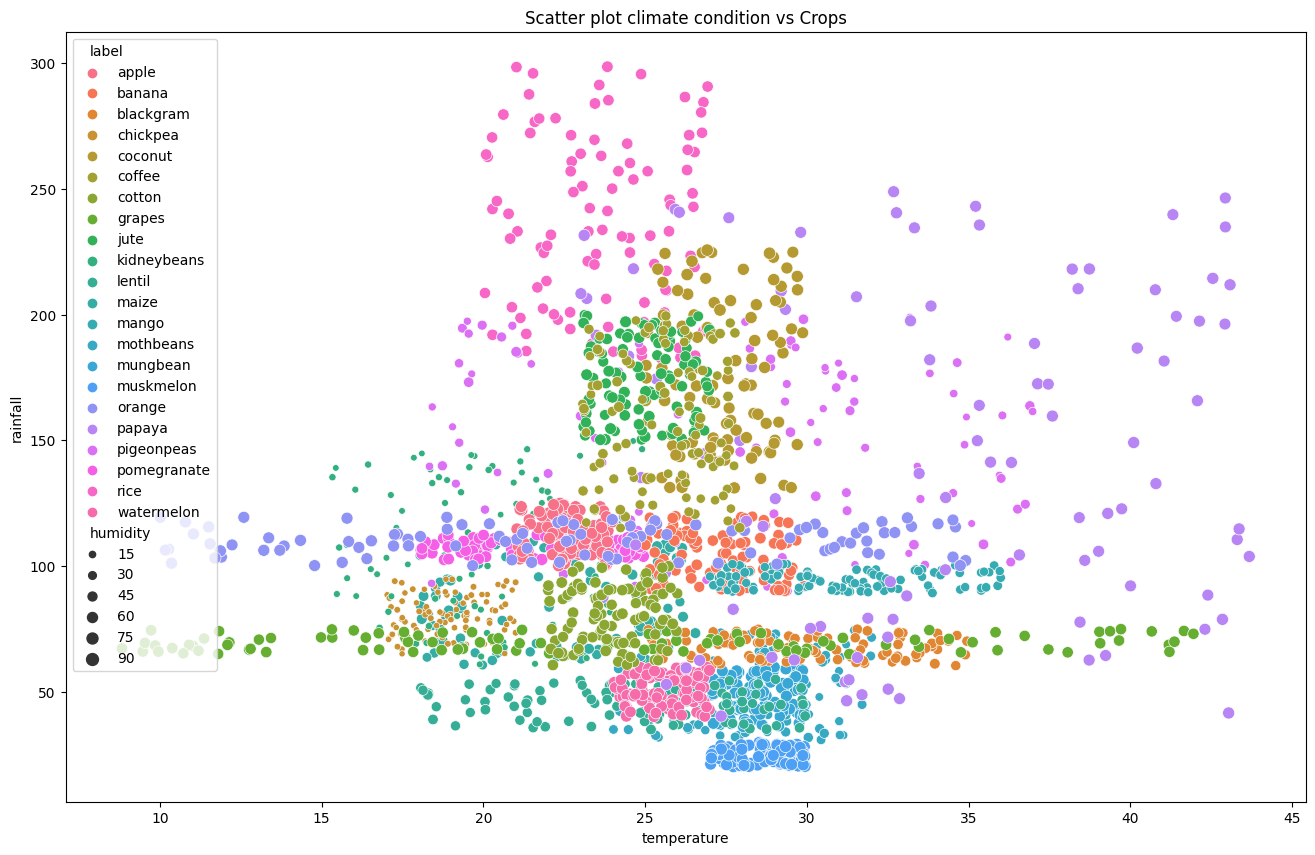

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_crop, x='temperature', y='rainfall', hue='label', size='humidity', sizes=(20, 80))
plt.title('Scatter plot climate condition vs Crops')
plt.show()

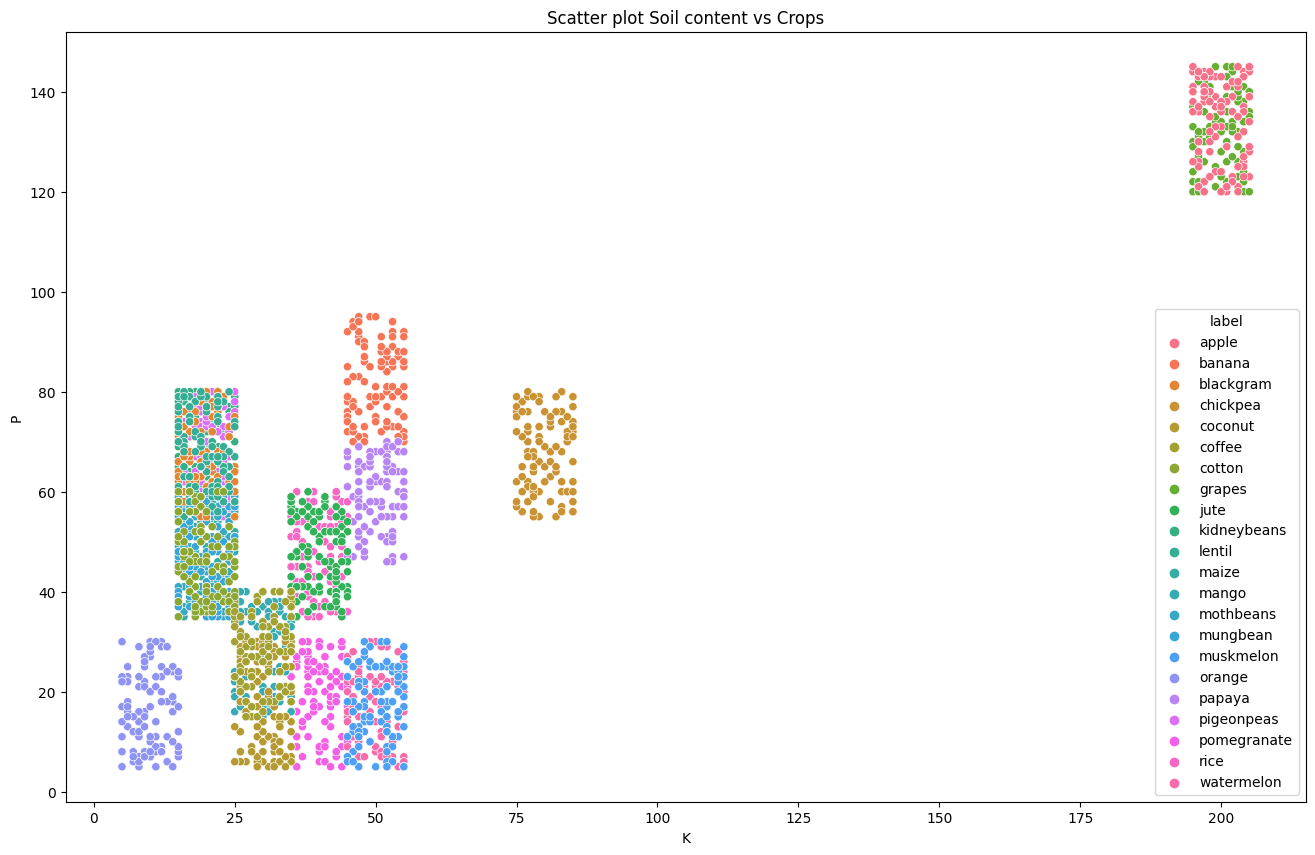

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_crop, x='K', y='P', hue='label')
plt.title('Scatter plot Soil content vs Crops')
plt.show()

**Hypothesis testing**

In [49]:
numerical_vars = ["N", "P", "K", "temperature","humidity", "ph","rainfall"]

for var in numerical_vars:
    f_statistic, p_value = f_oneway(*[group[var] for label, group in df_crop.groupby('label')])
    if p_value > 0.05:
        print(f"As the p-value-{p_value} is greater than alpha (0.05), {var} is less significant to predicting label.\n")
    else:
        print(f"As the p-value-{p_value} is less than alpha (0.05), {var} is highly significant to predicting label.\n")

As the p-value-0.0 is less than alpha (0.05), N is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), P is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), K is highly significant to predicting label.

As the p-value-4.019323818173197e-305 is less than alpha (0.05), temperature is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), humidity is highly significant to predicting label.

As the p-value-6.4931618988390225e-199 is less than alpha (0.05), ph is highly significant to predicting label.

As the p-value-0.0 is less than alpha (0.05), rainfall is highly significant to predicting label.



# MODEL TRANING

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb


from sklearn.metrics import accuracy_score, r2_score ,classification_report
from sklearn import feature_selection

from sklearn.model_selection import GridSearchCV

In [64]:
scaler=StandardScaler()
X=df_crop.drop('label',axis=1)
y=df_crop['label']
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=40)

**1.Logistic Regression**

In [73]:
log_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

In [74]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred=log_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9651515151515152
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.84      1.00      0.91        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.81      0.97      0.88        31
 kidneybeans       0.94      1.00      0.97        29
      lentil       0.96      0.92      0.94        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.81      0.90        27
    mungbean       0.97      1.00      0.99        34
   muskmelon       0.95      1.00      0.97        36
      orange       1.00      1.00      1.00        3

In [78]:
inp=np.array([20,129,206,15,80,5,60])
inp=inp.reshape(1, -1)
ans=log_model.predict(inp)
ans

array(['apple'], dtype=object)

**2.SGDClassifier**

In [79]:
#gradiat decent
SGD_Model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

In [80]:
SGD_Model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log_loss',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
y_pred=SGD_Model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9409090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      0.97      0.98        30
   blackgram       0.70      1.00      0.83        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.94      0.97        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      0.92      0.96        36
      grapes       1.00      0.97      0.98        29
        jute       0.71      0.94      0.81        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      0.88      0.94        25
       maize       0.88      0.97      0.92        30
       mango       1.00      0.97      0.99        40
   mothbeans       0.95      0.78      0.86        27
    mungbean       1.00      0.97      0.99        34
   muskmelon       0.97      1.00      0.99        36
      orange       1.00      0.97      0.98        3

In [130]:
#hyper parameter
Model=LogisticRegression(multi_class='multinomial', max_iter=500)
params={
    'solver':['newton-cg','lbfgs','libliner'],
    'penalty':['l1','l2'],
    'C':[100,10,0.1,0.01]
     }


In [131]:
GS_model=GridSearchCV(estimator=Model,param_grid=params , cv=5 ,scoring='accuracy', n_jobs=-1 )

In [141]:
GS_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'libliner']},
             scoring='accuracy')

In [151]:
print(GS_model.best_estimator_)
GS_model.best_params_

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg')


{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [146]:
gs_pred=GS_model.predict(X_test)

In [147]:
gs_acc=accuracy_score(y_test,gs_pred)

In [148]:
gs_acc

0.9833333333333333

**3.Naive Bayes**

In [82]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)


# acc.append(x)
# model.append('Naive Bayes')

y_pred=NaiveBayes.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.89      1.00      0.94        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        3

**4.Decision Tree**

In [83]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

y_pred=DecisionTree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9318181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.63      0.92      0.75        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.85      0.92        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.42      0.59        31
 kidneybeans       1.00      0.86      0.93        29
      lentil       0.93      1.00      0.96        25
       maize       0.80      0.93      0.86        30
       mango       1.00      0.95      0.97        40
   mothbeans       1.00      0.52      0.68        27
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        3

**5.Random Forest Classifier**

In [84]:
RFC = RandomForestClassifier(n_estimators=20, random_state=0)
RFC.fit(X_train,y_train)

y_pred=RFC.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        32
      banana       1.00      1.00      1.00        30
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        29
        jute       0.94      1.00      0.97        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      0.96      0.98        27
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        3

**XGBoost**

In [ ]:

# XB = xgb.XGBClassifier()
# XB.fit(Xtrain,Ytrain)

# predicted_values = XB.predict(Xtest)

# x = metrics.accuracy_score(Ytest, predicted_values)

# print("XGBoost's Accuracy is: ", x)

# print(classification_report(Ytest,predicted_values))

In [53]:
# !pip install pycaret pandas shap
from pycaret.classification import *

In [55]:
experiment = setup(df_crop,target='label',numeric_features=numerical_vars ,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) HD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) HD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) HD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) HD Graphics 620, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [56]:
best_model= compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [57]:
predict_model(best_model)

N   P   K  temperature   humidity        ph    rainfall      label  \
1690   20  29  10    29.074127  93.271889  7.365492  100.789688     orange   
887    40  61  22    20.949818  65.810875  7.002216   44.239132     lentil   
236    57  58  77    18.726494  17.584064  7.978997   81.201767   chickpea   
1455  109  12  48    29.457718  92.125351  6.708744   20.762121  muskmelon   
193    87  48  25    18.653967  61.378796  6.656730   93.620392      maize   
...   ...  ..  ..          ...        ...       ...         ...        ...   
1818   22  11  29    28.033806  95.016304  5.955743  218.005569    coconut   
176    74  39  23    22.626511  65.774727  6.780736   88.172508      maize   
2096   88  52  39    23.928879  88.071121  6.880205  154.660873       jute   
248    57  60  84    19.103428  17.261845  6.586777   75.491013   chickpea   
217    39  71  84    20.281559  16.395351  8.140825   82.523399   chickpea   

     prediction_label  prediction_score  
1690           orange            1.0000  
887            lentil            0.9998  
236          chickpea            1.0000  
1455        muskmelon            1.0000  
193             maize            1.0000  
...               ...               ...  
1818          coconut            1.0000  
176             maize            1.0000  
2096             jute            1.0000  
248          chickpea            1.0000  
217          chickpea            1.0000  

[660 rows x 10 columns]